<a href="https://colab.research.google.com/github/akv2011/Tumor-Detection/blob/main/Drdo_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
!mkdir drive

mkdir: cannot create directory ‘drive’: File exists


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:


launch=pd.read_csv('/content/drive/MyDrive/DRDO/RocketLaunchDataCompleted.csv',encoding='latin-1')
launch.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,4-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,5-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,6-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN
3,NaN,7-Dec-58,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25,Partly Cloudy,NaN
4,NaN,8-Dec-58,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24,Partly Cloudy,NaN


In [5]:
launch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

In [7]:
launch.columns


launch['Launched?'] = launch['Launched?'].fillna('N')
launch['Crewed or Uncrewed'] = launch['Crewed or Uncrewed'].fillna('Uncrewed')
launch['Wind Direction'] = launch['Wind Direction'].fillna('Unknown')
launch['Condition'] = launch['Condition'].fillna('Fair')
launch['Sea Level Pressure'] = launch['Sea Level Pressure'].fillna(0)
launch['Day Length'] = launch['Day Length'].fillna('00:00')
launch['Notes'] = launch['Notes'].fillna(0)

launch.fillna(0,inplace=True)

output_file_path = '/content/drive/MyDrive/DRDO/Clean_data.csv'
launch.to_csv(output_file_path, index=False)



In [8]:

launch.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,4-Dec-58,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26,Cloudy,0
1,0,5-Dec-58,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26,Cloudy,0
2,Pioneer 3,6-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25,Cloudy,0
3,0,7-Dec-58,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25,Partly Cloudy,0
4,0,8-Dec-58,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24,Partly Cloudy,0


In [9]:
launch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          300 non-null    object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             300 non-null    object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            300 non-null    object 
 5   Launched?                     300 non-null    object 
 6   High Temp                     300 non-null    float64
 7   Low Temp                      300 non-null    float64
 8   Ave Temp                      300 non-null    float64
 9   Temp at Launch Time           300 non-null    float64
 10  Hist High Temp                300 non-null    float64
 11  Hist Low Temp                 300 non-null    float64
 12  Hist Ave Temp                 300 non-null    float64
 13  Perci

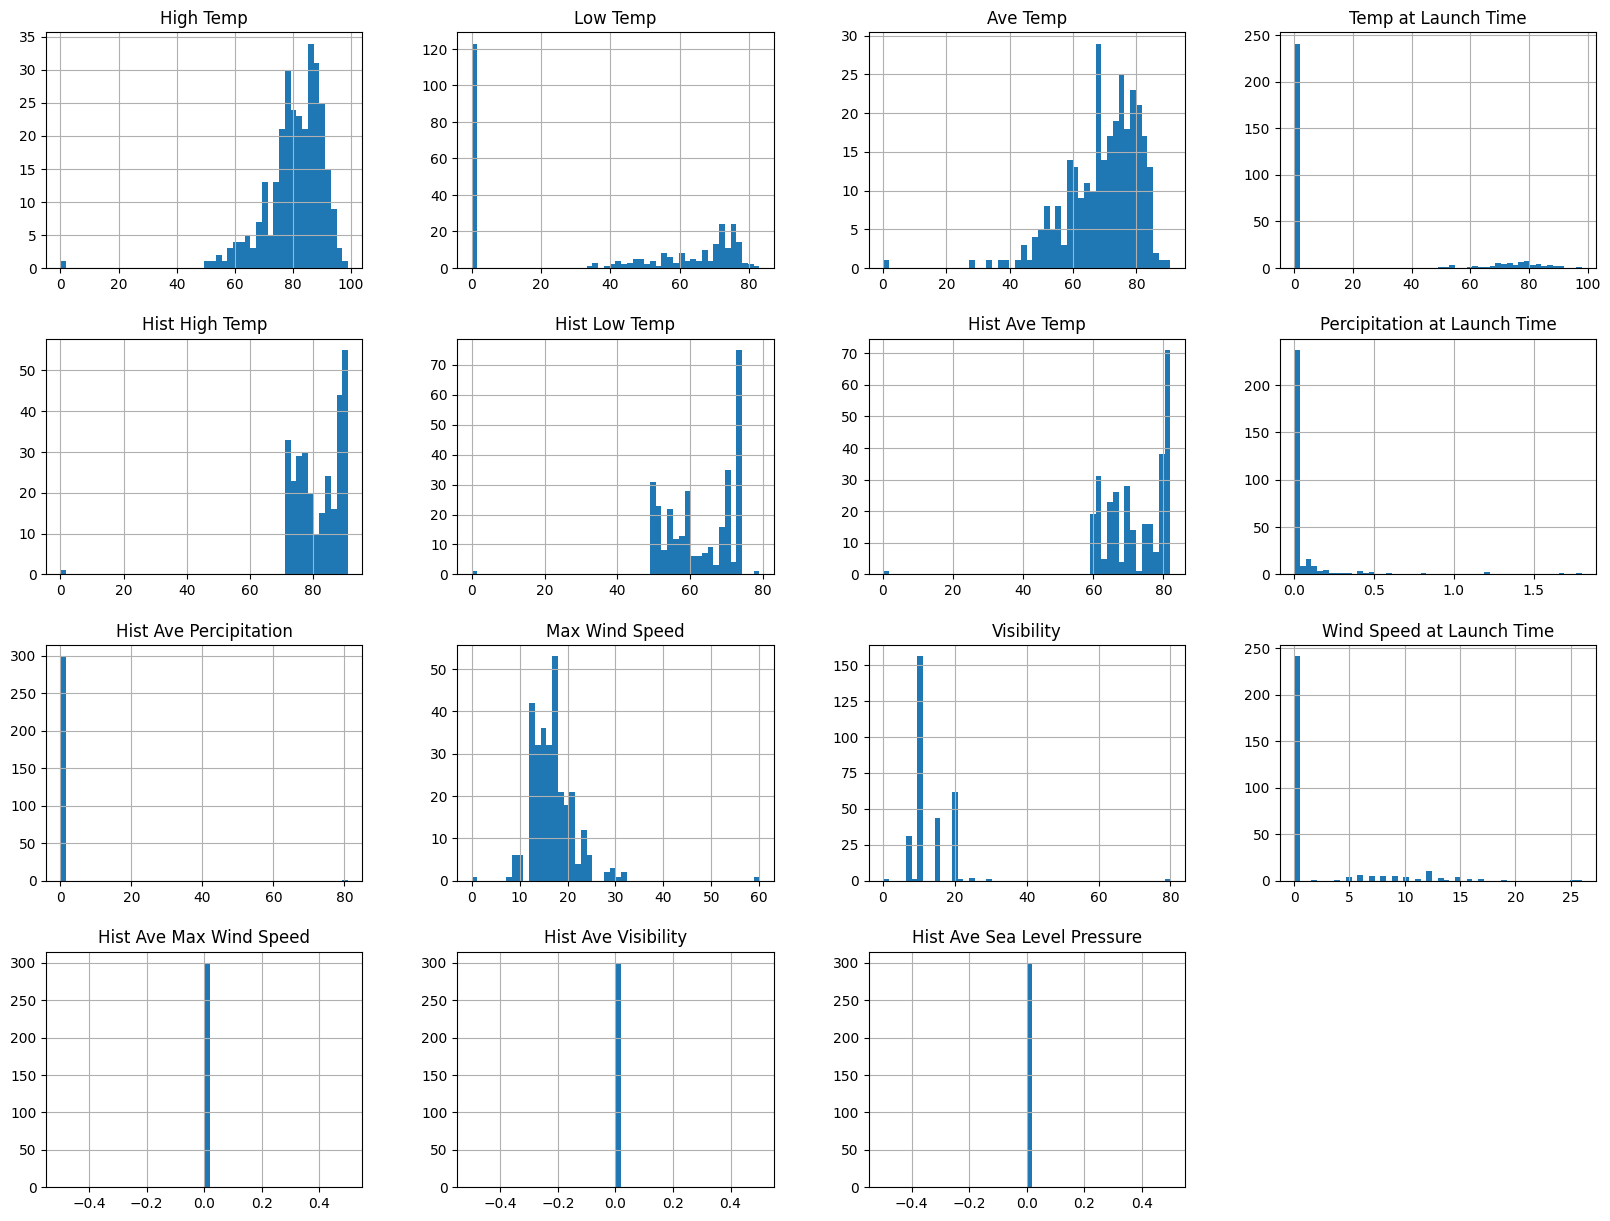

In [10]:


launch.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:

launch=pd.read_csv('/content/drive/MyDrive/DRDO/Clean_data.csv')

launch.columns



launch['Crewed or Uncrewed'] = launch['Crewed or Uncrewed'].map({'Uncrewed': 0, 'Crewed': 1})


label_encoder = LabelEncoder()

launch['Wind Direction'] = label_encoder.fit_transform(launch['Wind Direction'])
launch['Condition'] = label_encoder.fit_transform(launch['Condition'])


output_file_path = '/content/drive/MyDrive/DRDO/Encoded.csv'
launch.to_csv(output_file_path, index=False)


In [14]:
launch=pd.read_csv('/content/drive/MyDrive/DRDO/Encoded.csv')

launch.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,4-Dec-58,0,Cape Canaveral,0,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26,0,0
1,0,5-Dec-58,0,Cape Canaveral,0,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26,0,0
2,Pioneer 3,6-Dec-58,1:45,Cape Canaveral,0,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25,0,0
3,0,7-Dec-58,0,Cape Canaveral,0,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25,6,0
4,0,8-Dec-58,0,Cape Canaveral,0,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24,6,0


In [15]:

print(launch.isna().sum())

print(launch['Crewed or Uncrewed'].unique())
print(launch['Wind Direction'].unique())
print(launch['Condition'].unique())


Name                            0
Date                            0
Time (East Coast)               0
Location                        0
Crewed or Uncrewed              0
Launched?                       0
High Temp                       0
Low Temp                        0
Ave Temp                        0
Temp at Launch Time             0
Hist High Temp                  0
Hist Low Temp                   0
Hist Ave Temp                   0
Percipitation at Launch Time    0
Hist Ave Percipitation          0
Wind Direction                  0
Max Wind Speed                  0
Visibility                      0
Wind Speed at Launch Time       0
Hist Ave Max Wind Speed         0
Hist Ave Visibility             0
Sea Level Pressure              0
Hist Ave Sea Level Pressure     0
Day Length                      0
Condition                       0
Notes                           0
dtype: int64
[0 1]
[0 2 1 5 8 3 4 6 7]
[ 0  6  4  1 10  8  7  9  5  3  2]


In [16]:
y=launch['Launched?']

launch.drop(['Name', 'Date', 'Time (East Coast)', 'Location', 'Launched?', 'Hist Ave Sea Level Pressure', 'Sea Level Pressure', 'Day Length', 'Notes', 'Hist Ave Max Wind Speed'], axis = 1, inplace=True) #Save remaining data as input data
X = launch

X.columns

tree_model = DecisionTreeClassifier(random_state=0, max_depth=5)

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=99)
tree_model.fit(X_train, y_train)


y_pred=tree_model.predict(X_test)
print("Prediction on test data: \n", y_pred)
print("\n Acuuracy: \n",tree_model.score(X_test,y_test))

Prediction on test data: 
 ['N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'Y']

 Acuuracy: 
 0.9833333333333333


Model


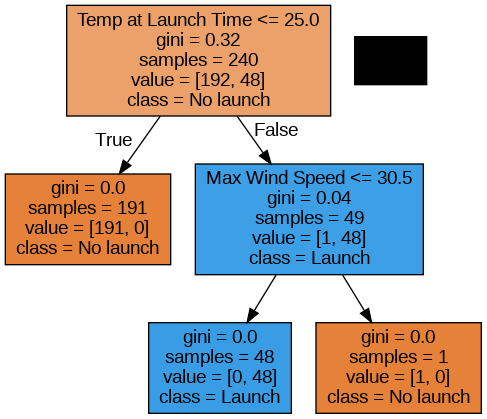

In [22]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
  tree_str = export_graphviz(tree, feature_names=feature_names,class_names=['No launch','Launch'], filled=True, out_file=None)
  graph=pydotplus.graph_from_dot_data(tree_str)
  graph.write_png(png_file_to_save)

  return Image(graph.create_png())

print("Model")
tree_graph_to_png(tree=tree_model, feature_names=X.columns.values,png_file_to_save='tree.png')

In [46]:
import pandas as pd

def replace_and_convert(df, column_name='Sea Level Pressure',
                          old_value='20:52', new_value=20.52):
    """Replaces a specific string value and converts the column to floats.

    Args:
        df (pd.DataFrame): The Pandas DataFrame.
        column_name (str): Name of the column to process.
        old_value (str): The specific string value to replace.
        new_value (float): The numerical value to replace the old string with.

    Returns:
        pd.DataFrame: The DataFrame with the replaced and converted column.
    """

    df[column_name] = df[column_name].replace(old_value, str(new_value))
    df[column_name] = df[column_name].astype(float)
    return df


# Example Usage
launch = pd.read_csv('/content/drive/MyDrive/DRDO/Encoded.csv')
launch = replace_and_convert(launch, 'Sea Level Pressure', '20:52', 20.52)
print(launch['Sea Level Pressure'].unique())
launch.to_csv('/content/drive/MyDrive/DRDO/Encoded.csv', index=False)


[30.22 30.2  30.25 30.28 30.23 30.13 30.19 30.11 30.12 29.98 30.03 30.01
 29.99 30.04 30.08 30.27 30.3  30.14 30.16 30.1  30.   30.09 29.97 30.29
 30.33 30.26 30.24 30.21 20.52 30.54 29.91 30.17 30.18 29.96 29.8  29.75
 29.81 29.92 29.9  29.93 29.88 31.21 30.07 29.95 30.15 30.05 30.41 29.94
 30.06 30.02  0.   29.87 30.34 30.38 30.4  30.35 30.39 30.32 30.91]


In [47]:


launch = pd.read_csv('/content/drive/MyDrive/DRDO/Encoded.csv')
y = launch['Launched?']
X = launch[['Max Wind Speed', 'High Temp', 'Ave Temp', 'Low Temp','Temp at Launch Time', 'Visibility',
            'Wind Speed at Launch Time', 'Sea Level Pressure']]




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

tree_model = DecisionTreeClassifier(random_state=0, max_depth=5)
tree_model.fit(X_train, y_train)

def predict_launch():


    temperature = float(input("Enter Temperature: "))
    visibility = float(input("Enter Visibility: "))
    sea_level_pressure = float(input("Enter Sea Level Pressure: "))


    user_input = pd.DataFrame({
        'Max Wind Speed': [wind_speed],
        'High Temp': [temperature],
        'Ave Temp': [temperature],
        'Low Temp': [temperature],
        'Temp at Launch Time': [temperature],
        'Visibility': [visibility],
        'Wind Speed at Launch Time': [wind_speed],
        'Sea Level Pressure': [sea_level_pressure]
    })


    prediction = tree_model.predict(user_input)[0]


    if prediction == 1:
        print("Launch is likely!")
    else:
        print("Launch might not be advisable.")


predict_launch()

Enter Wind Speed: 20
Enter Temperature: 30
Enter Visibility: 35
Enter Sea Level Pressure: 18.2
Launch might not be advisable.
